# Customer Churn Analysis of Telecom Company

### Customer Churn refers to the rate at which customers end their subscription or service with a company. This can be measured as a percentage of customers who discontinue their service over a given period.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df["customerID"].duplicated().sum()

0

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

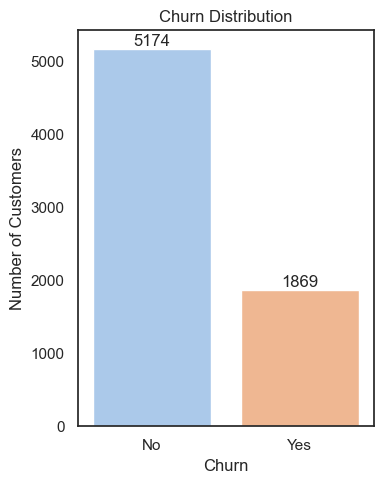

In [42]:
# Set seaborn style

sns.set(style="white")
 # style must be one of white, dark, whitegrid, darkgrid, ticks


# 1. Churn Distribution
plt.figure(figsize=(4, 5))
ax=sns.countplot(x='Churn', data=df, palette='pastel' ,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

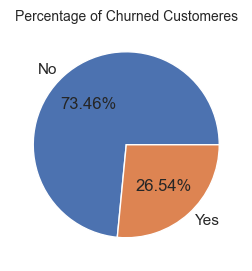

In [43]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

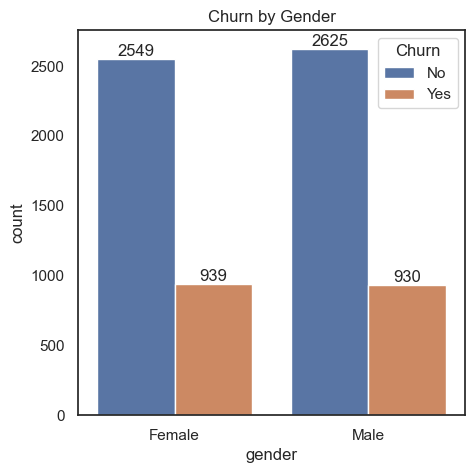

In [39]:
plt.figure(figsize = (5,5))
ax=sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Gender")
plt.show()

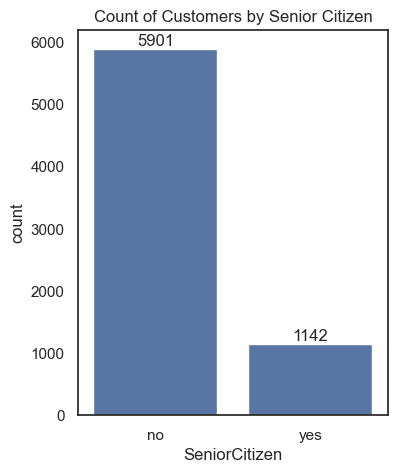

In [14]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

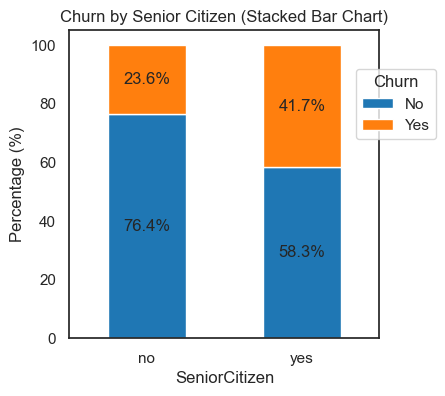

In [15]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

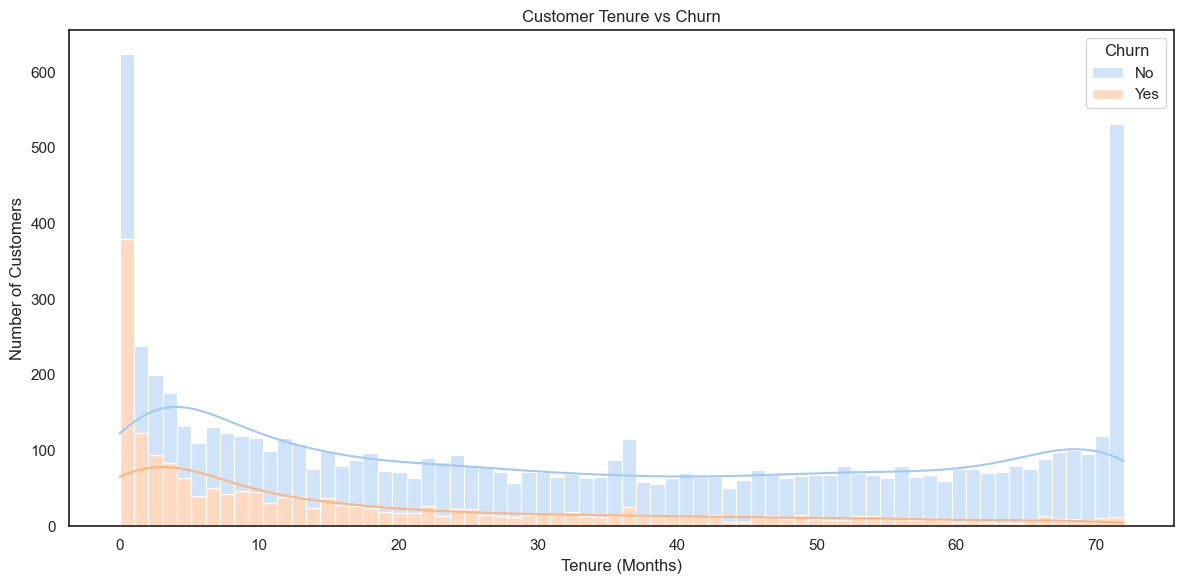

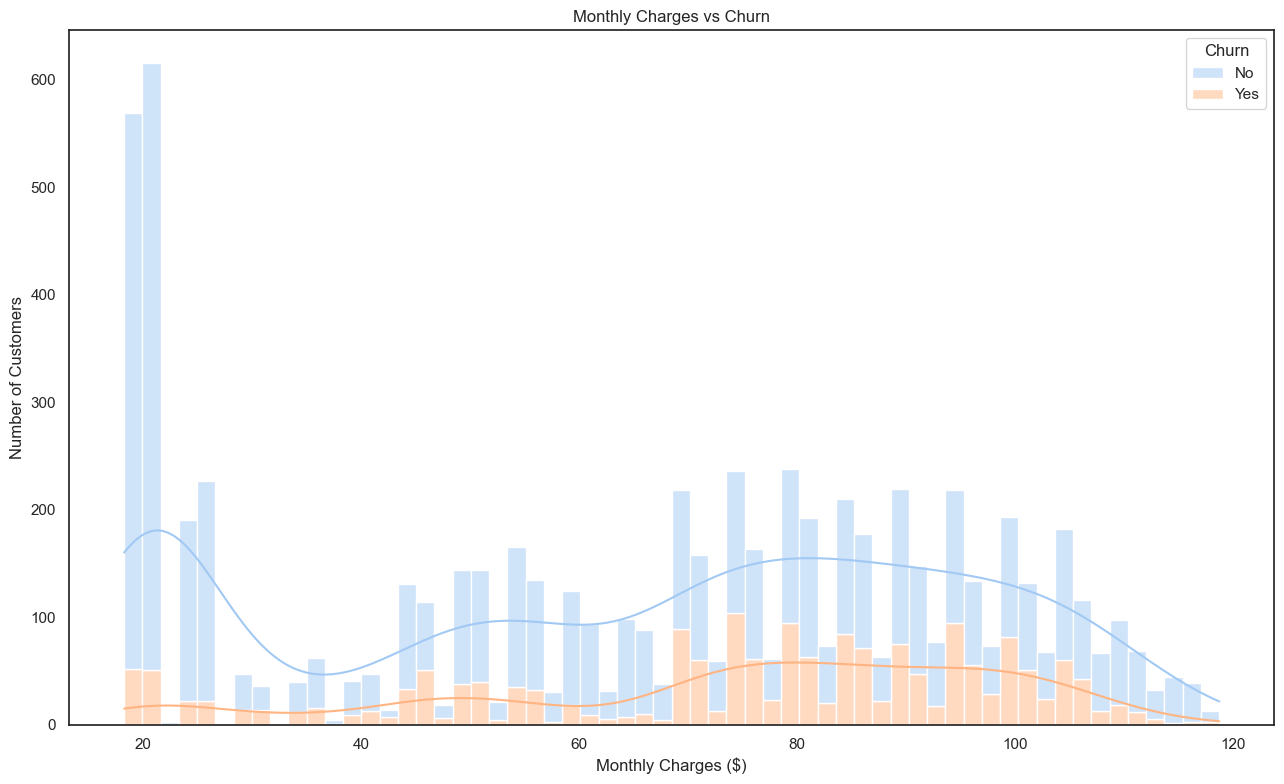

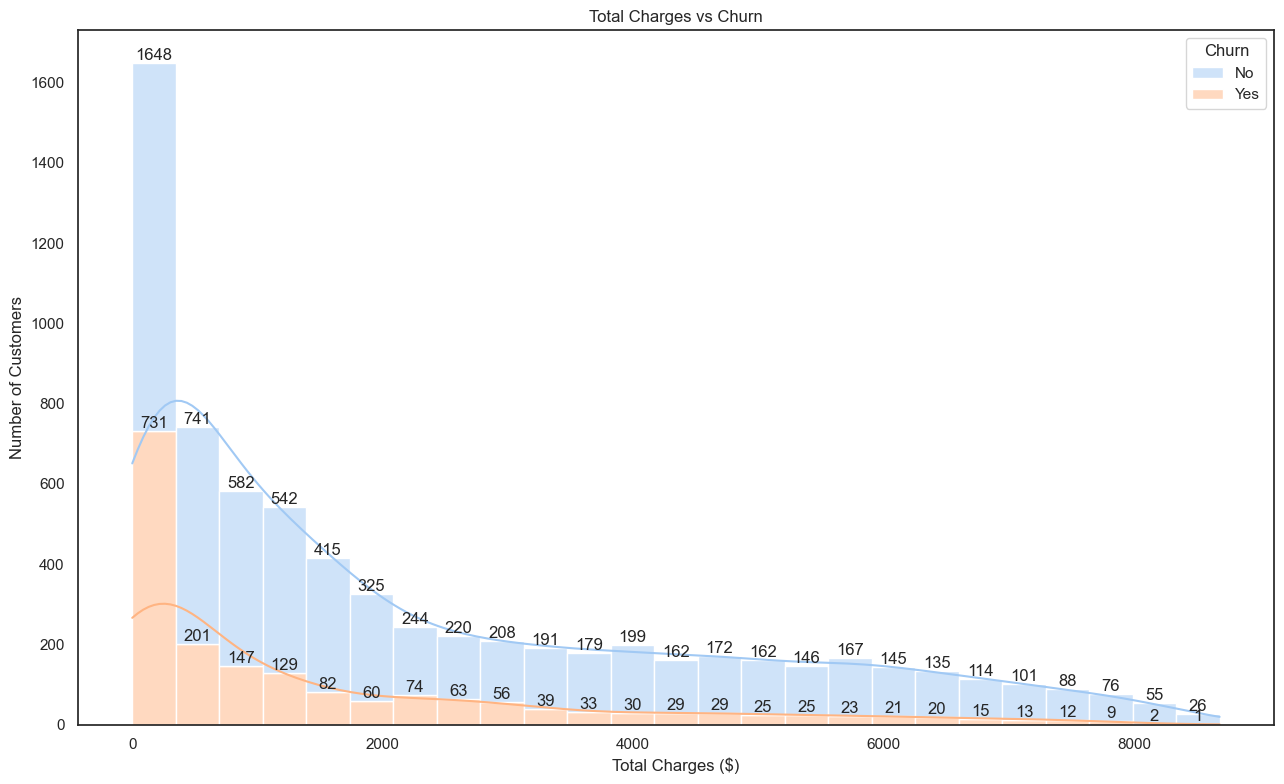

In [50]:
# 2A. Tenure vs Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=70,kde=True, multiple='stack', palette='pastel')
plt.title('Customer Tenure vs Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# 2B. Monthly Charges vs Churn

labels=np.arange(0,120,2)
# print(labels)
plt.figure(figsize=(13, 8))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn',bins=60, kde=True, multiple='stack', palette='pastel',label=labels)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# 2C. Total Charges vs Churn
plt.figure(figsize=(13, 8))
ax=sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, multiple='stack', palette='pastel')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Total Charges vs Churn')
plt.xlabel('Total Charges ($)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


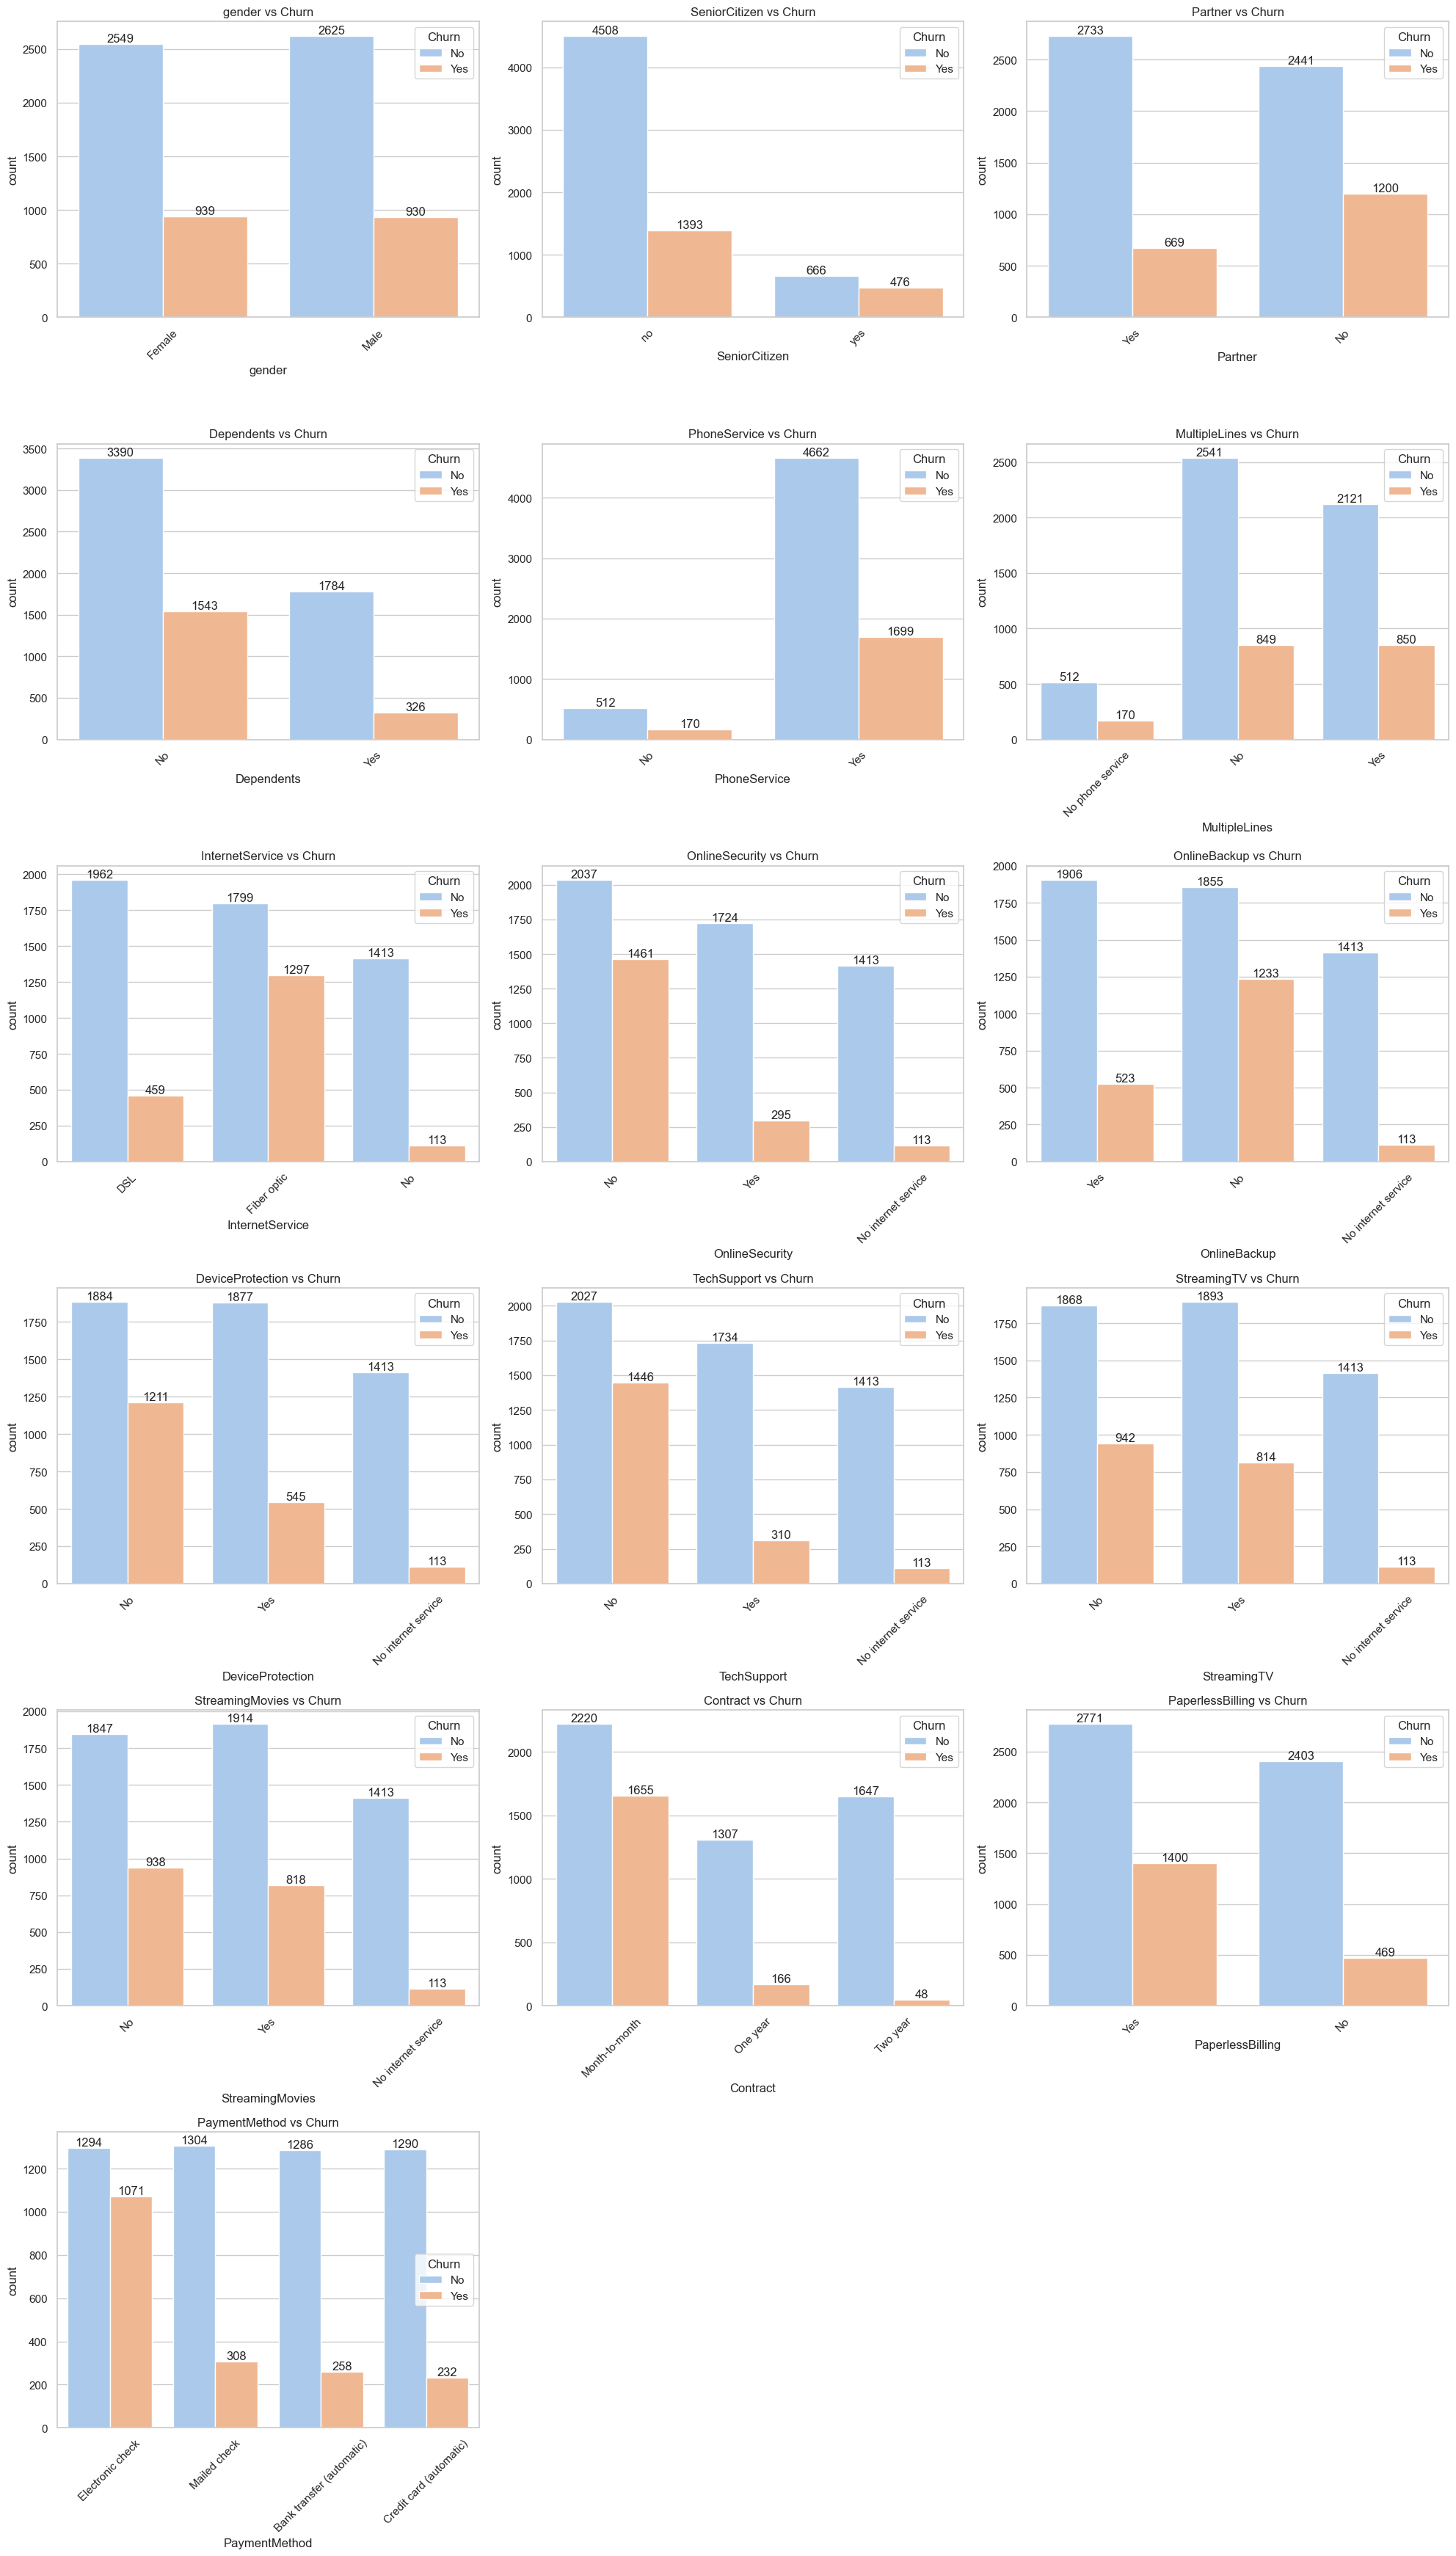

In [52]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']


# Set grid layout for plotting
sns.set(style="whitegrid")
plt.figure(figsize=(20, 35))

# Loop through columns to create subplots
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i+1 )
    ax=sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


This shows the churn info against each fields 

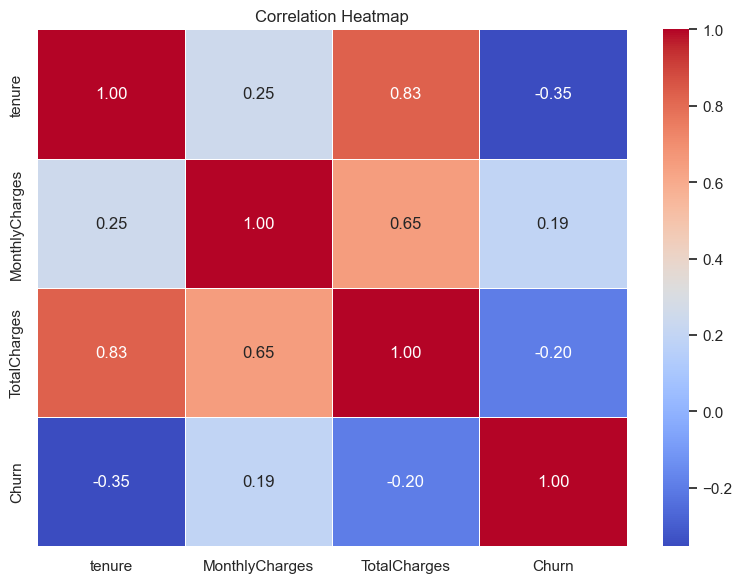

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Churn' to numeric for correlation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Select only numeric columns
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


This will highlight important correlations, especially how Churn correlates with tenure, MonthlyCharges, and TotalCharges.

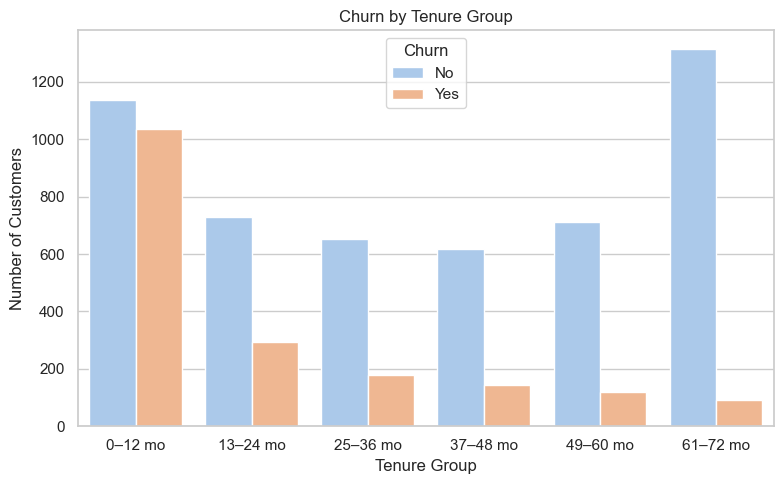

In [26]:


# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Create tenure bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0–12 mo', '13–24 mo', '25–36 mo', '37–48 mo', '49–60 mo', '61–72 mo']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# Plot churn by tenure group
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TenureGroup', hue='Churn', palette='pastel')
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


Customers in the 0–12 month range have the highest churn rate, which drops significantly with longer tenure. This suggests the first year is critical for customer retention efforts.

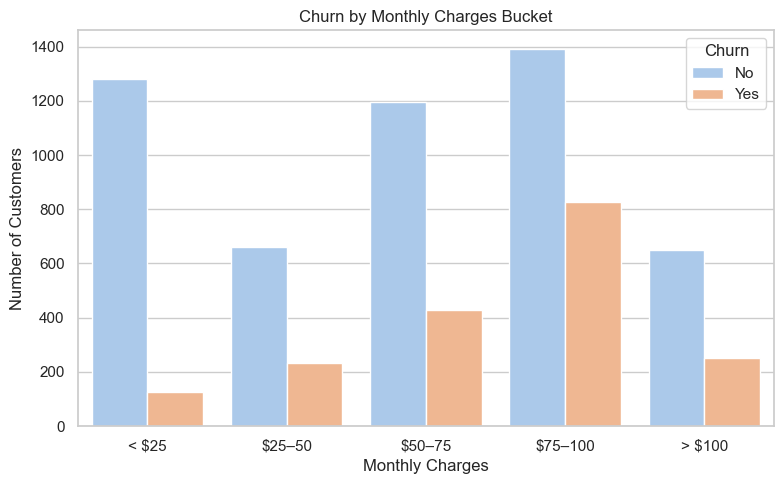

In [27]:
# Create Monthly Charges buckets
charge_bins = [0, 25, 50, 75, 100, 125]
charge_labels = ['< $25', '$25–50', '$50–75', '$75–100', '> $100']
df['ChargeGroup'] = pd.cut(df['MonthlyCharges'], bins=charge_bins, labels=charge_labels)

# Plot churn by monthly charge group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ChargeGroup', hue='Churn', palette='pastel')
plt.title('Churn by Monthly Charges Bucket')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


Customers paying $75 or more per month have a significantly higher churn rate compared to those in lower charge brackets. This suggests pricing sensitivity and possible dissatisfaction with high-cost plans.
